In [8]:
import sklearn, pyod
from pyod.utils.data import generate_data
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_curve, auc
from pyod.models.knn import KNN
import numpy as np

print(sklearn.__version__, pyod.__version__)

1.7.2 2.0.5


# Ex1

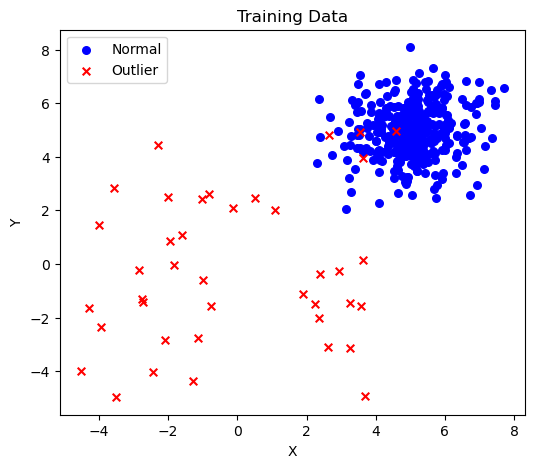

In [20]:

CONTAMINATION_RATE = 0.1

#EX 1
X_train, X_test, y_train, y_test = generate_data(
    n_train=400,
    n_test=100,
    n_features=2,
    contamination=CONTAMINATION_RATE,
    random_state=1
)

plt.figure(figsize=(6, 5))

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1],
            c='blue', label='Normal', s=30)

plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1],
            c='red', label='Outlier', s=30, marker='x')

plt.title('Training Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


# Ex 2

In [21]:
# Ex 2


# Fit the training data
model = KNN(contamination=CONTAMINATION_RATE)
model.fit(X_train)

# Predict the training and testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train)
print(y_pred_test)



[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1

In [22]:
# Confusion matrix -> TN,FP,FN,TP, balanced_score

def metrics(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred,labels=[0,1])
    TN, FP, FN, TP = conf_mat.ravel()
    balanced_score = balanced_accuracy_score(y_true, y_pred)
    return TN, FP, FN, TP, balanced_score

print(metrics(y_train, y_pred_train))
print(metrics(y_test, y_pred_test))


(np.int64(357), np.int64(3), np.int64(4), np.int64(36), 0.9458333333333333)
(np.int64(90), np.int64(0), np.int64(4), np.int64(6), 0.8)


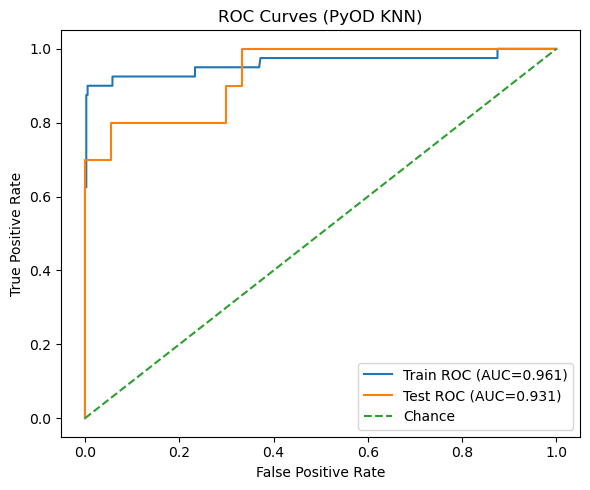

In [23]:
# ROC curves

decision_scores = model.decision_scores_

fpr_train, tpr_train, _ = roc_curve(y_train, decision_scores)
auc_train = auc(fpr_train, tpr_train)


scores_test = model.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, scores_test)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(6,5))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC={auc_train:.3f})")
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC={auc_test:.3f})")
plt.plot([0,1], [0,1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (PyOD KNN)")
plt.legend()
plt.tight_layout()
plt.show()




In [24]:

# Test scores based on contamination

for c in [0.05, 0.1, 0.2, 0.3]:
    m = KNN(contamination=c).fit(X_train)
    yp_tr = m.predict(X_train)
    yp_te = m.predict(X_test)
    _, _, _, _, bal_tr_c = metrics(y_train, yp_tr)
    _, _, _, _, bal_te_c = metrics(y_test,  yp_te)
    print(f"contamination={c:.2f} -> balanced_acc [train]={bal_tr_c:.3f}, [test]={bal_te_c:.3f}")

contamination=0.05 -> balanced_acc [train]=0.675, [test]=0.650
contamination=0.10 -> balanced_acc [train]=0.946, [test]=0.800
contamination=0.20 -> balanced_acc [train]=0.915, [test]=0.850
contamination=0.30 -> balanced_acc [train]=0.874, [test]=0.783


# Ex 3

In [33]:
# Generate 1D dataset: 1000 training samples, 10% contamination, no test set

CONTAMINATION_RATE = 0.10

X_train, X_test, y_train, y_test = generate_data(
    n_train=100000,
    n_test=0,
    n_features=1,
    contamination=CONTAMINATION_RATE,
    random_state=789782
)

x = X_train.ravel()

# Compute Z-scores

mean = np.mean(x)
sigma = np.std(x)
zscore = np.abs((x - mean) / sigma)

# Compute quantile threshold
threshold = np.quantile(zscore, 1 - CONTAMINATION_RATE)

y_pred = (zscore >= threshold).astype(int)

# Metrics: confusion matrix + balanced accuracy
confusion_mat = confusion_matrix(y_train, y_pred, labels=[0, 1])
TN, FP, FN, TP = confusion_mat.ravel()
bal_acc = balanced_accuracy_score(y_train, y_pred)

print(f"Threshold (Z): {threshold:.3f}")
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"Balanced accuracy: {bal_acc:.3f}")
print(f"Confusion matrix: \n {confusion_mat}")


Threshold (Z): 0.295
TN=89015, FP=985, FN=985, TP=9015
Balanced accuracy: 0.945
Confusion matrix: 
 [[89015   985]
 [  985  9015]]


# Ex 4

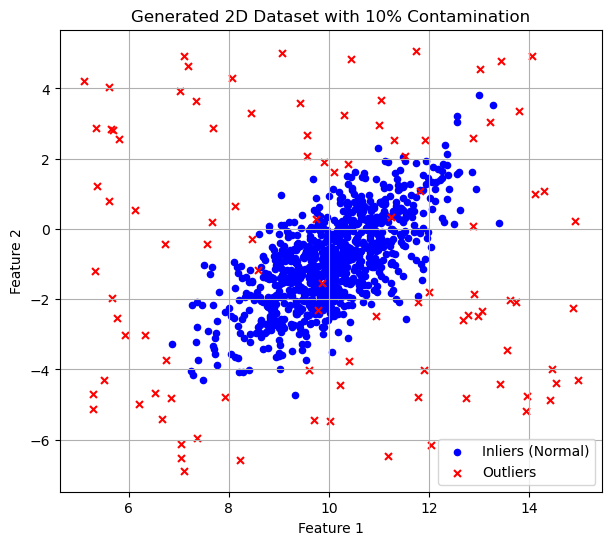

Chosen mean: [10. -1.]
Chosen sigma:
[[1.  0.8]
 [0.8 1.5]]
Cholesky L:
[[1.         0.        ]
 [0.8        0.92736185]]

Z-score threshold (L2 over features): 2.259
Confusion matrix [[TN, FP], [FN, TP]]:
[[874  26]
 [ 26  74]]
TN=874, FP=26, FN=26, TP=74
Balanced accuracy: 0.856


In [7]:
rng = np.random.default_rng(787878)

# Params
n_train = 1000
contamination_rate = 0.10
d = 2
n_out = int(n_train * contamination_rate)
n_in = n_train - n_out

# Choose mean vector and covariance matrix sigma (positive definite)
mean = np.array([10.0, -1.0])
sigma = np.array([
    [1.0, 0.8],
    [0.8, 1.5]
])

# Build inliers by hand: x ~ N(0, I), y = Lx + mu -----
L = np.linalg.cholesky(sigma)         # sigma = L L^T
x_in = rng.standard_normal((n_in, d))  # N(0, I)
y_in = np.dot(x_in, L.T) + mean                 # N(mu, sigma)

# Inject outliers (10%)
# Make a wide uniform box around mu to simulate anomalies
std_diag = np.sqrt(np.diag(sigma))
low  = mean - 5 * std_diag
high = mean + 5 * std_diag
y_out = rng.uniform(low, high, size=(n_out, d))

# Labels: 0=inlier, 1=outlier
X = np.vstack([y_in, y_out])
y = np.hstack([np.zeros(n_in, dtype=int), np.ones(n_out, dtype=int)])

# Z-scores (per-feature)
# As in Ex.3, estimate mean/std from the training data itself
mu_hat = X.mean(axis=0)
sigma_hat = X.std(axis=0, ddof=0)

zscore = np.abs((X - mu_hat) / sigma_hat)   # per-feature absolute z-scores

# Turn the per-feature z-scores into a single anomaly score
# (use L2 norm of the z-vector for each sample)
score = np.linalg.norm(zscore, axis=1)

#
thr = np.quantile(score, 1 - contamination_rate)  # top 10% as anomalies
y_pred = (score >= thr).astype(int)

# Metrics
cm = confusion_matrix(y, y_pred, labels=[0, 1])  # [[TN, FP], [FN, TP]]
TN, FP, FN, TP = cm.ravel()
bal_acc = balanced_accuracy_score(y, y_pred)

# Plot
plt.figure(figsize=(7, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c="blue", s=20, label="Inliers (Normal)")
plt.scatter(X[y == 1, 0], X[y == 1, 1], c="red", s=25, marker="x", label="Outliers")

plt.title("Generated 2D Dataset with 10% Contamination")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

print(f"Chosen mean: {mean}")
print(f"Chosen sigma:\n{sigma}")
print(f"Cholesky L:\n{L}\n")
print(f"Z-score threshold (L2 over features): {thr:.3f}")
print(f"Confusion matrix [[TN, FP], [FN, TP]]:\n{cm}")
print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")
print(f"Balanced accuracy: {bal_acc:.3f}")
